# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv(r"C:\Users\visdas\OneDrive\Desktop\bankmarketing.csv")

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols.tolist())

# Load dataset
df = pd.read_csv(r"C:\Users\visdas\OneDrive\Desktop\bankmarketing.csv")

# Encode target variable
df['y_num'] = df['y'].map({'yes':1, 'no':0})

# Drop original target for features
X = df.drop(columns=['y','y_num'])
y = df['y_num']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Optional: Scale numerical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Now X and y are ready for ML models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:

# Check for missing values and data types
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:

# Summary statistics
# The datset containing 5 rows and 21 columns with 0 null values and 5 columns that containing int datatype and 5 columns containing float datatype, and remaing containing object datatype with total rows 41188.


C:\Users\visdas\AppData\Local\Temp\ipykernel_9856\2693028954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="Set2")


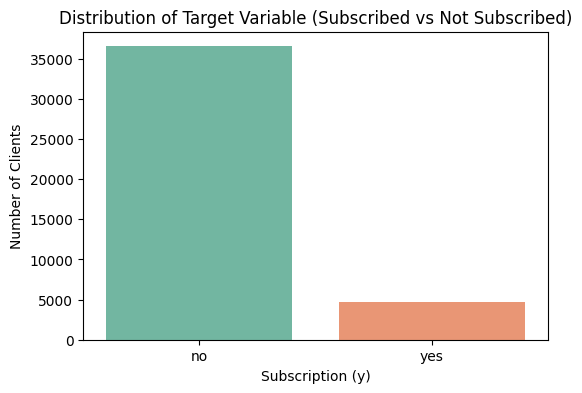

C:\Users\visdas\AppData\Local\Temp\ipykernel_9856\2693028954.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="Set2")


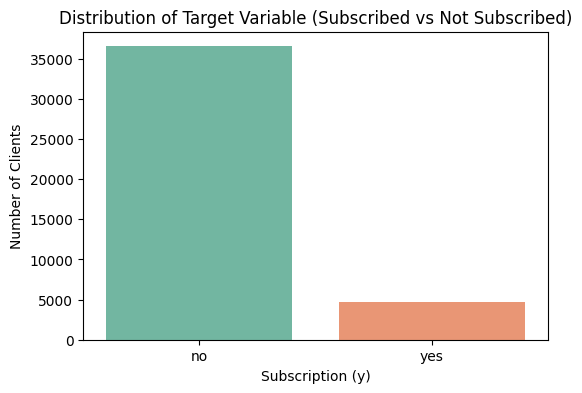

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\visdas\OneDrive\Desktop\bankmarketing.csv")

# Plot the distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df, palette="Set2")
plt.title("Distribution of Target Variable (Subscribed vs Not Subscribed)")
plt.xlabel("Subscription (y)")
plt.ylabel("Number of Clients")
plt.show()
# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df, palette="Set2")
plt.title("Distribution of Target Variable (Subscribed vs Not Subscribed)")
plt.xlabel("Subscription (y)")
plt.ylabel("Number of Clients")
plt.show()

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.0003

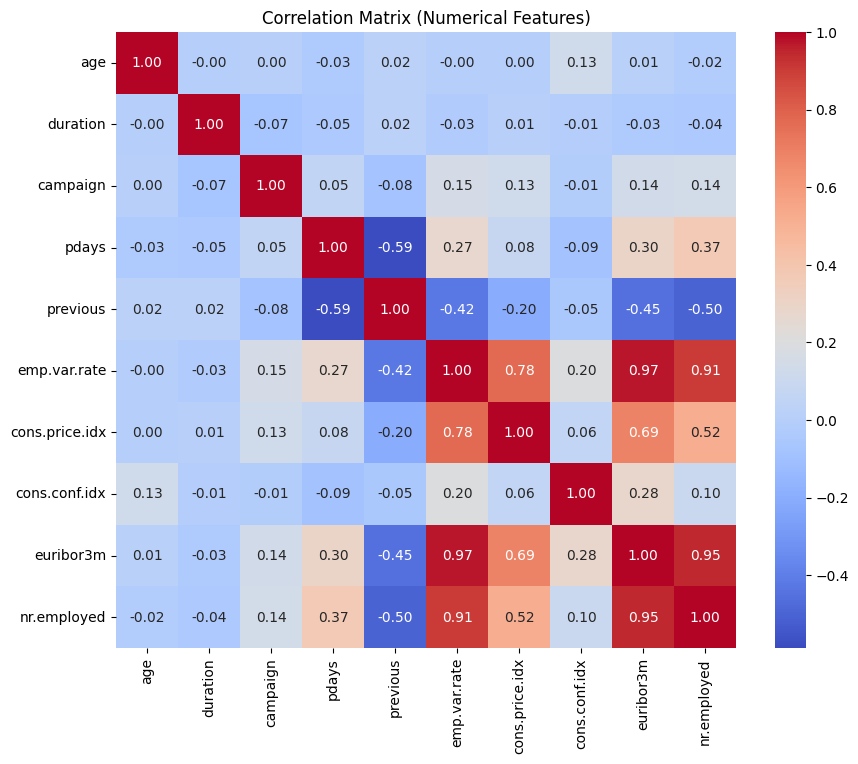

In [9]:

# Correlation matrix for numerical features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\visdas\OneDrive\Desktop\bankmarketing.csv")


# Select only numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", num_cols.tolist())

# Compute correlation matrix
corr_matrix = df[num_cols].corr()
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 3. Detailed Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9161204175770818

Confusion Matrix:
 [[7144  166]
 [ 525  403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [19]:
# For Logistic Regression
import numpy as np
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance.head(10))


                 Feature  Coefficient
42             month_mar     1.850723
1               duration     1.201977
6         cons.price.idx     1.126233
52      poutcome_success     0.855089
38             month_aug     0.759720
8              euribor3m     0.720176
14           job_retired     0.351282
51  poutcome_nonexistent     0.342195
27  education_illiterate     0.240399
39             month_dec     0.235032


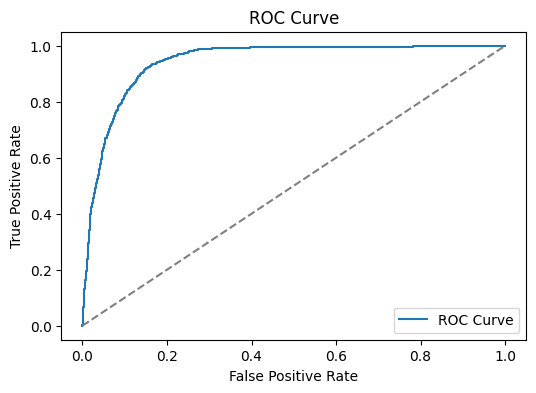

ROC-AUC Score: 0.9424596973913865


In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

print("Model Comparison:", results)


Model Comparison: {'Logistic Regression': 0.9161204175770818, 'Decision Tree': 0.894634620053411, 'Random Forest': 0.9181840252488468, 'SVM': 0.9145423646516144}


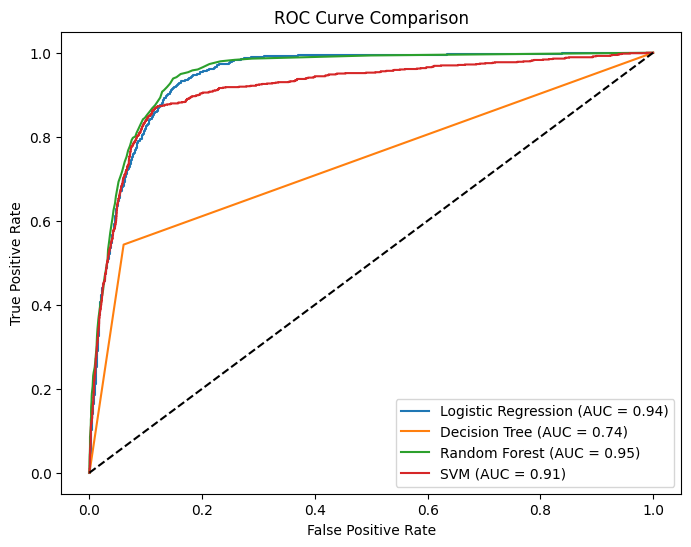

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# SVM (probability=True so we can get predict_proba)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
